In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

file_path = '/content/drive/My Drive/'

# Read the CSV file
data = pd.read_csv(file_path)

# List the column names
print("Column names:", df.columns.tolist())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Column names: ['conversation_date', 'department', 'queue_name', 'handled', 'offers', 'sla', 'talk_time', 'handle_time', 'acw', 'wait_time', 'wait', 'abandons', 'abandon_rate', 'time_to_abandon', 'unique_calls', 'rowrank', 'rowrank_segment', 'rowrank_session', 'rowrankseg', 'originating_direction', 'direction', 'o_direction', 'call_direction']


In [ ]:
# Cap handle_time at the 99th percentile
data.replace('(null)', np.nan, inplace=True)
handle_time_99th_percentile = data['handle_time'].quantile(0.99)
data['handle_time_capped'] = data['handle_time'].clip(upper=handle_time_99th_percentile)

# Convert conversation_date to datetime
data['conversation_date'] = pd.to_datetime(data['conversation_date'])

# Group by month and calculate the average handle_time
monthly_handle_time = data.groupby(data['conversation_date'].dt.month)['handle_time_capped'].mean().reset_index()

# This dataframe now holds the average handle time by month
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# For simplicity, let's assume we're using numerical columns as predictors
# A more detailed model would include preprocessing steps for categorical variables
X = data[['handled', 'talk_time']]  # Example predictors
y = data['handle_time_capped']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 223.45463161008996


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X has been appropriately preprocessed with new features and categorical encodings
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'Mean Absolute Error (Random Forest): {mae_rf}')


Mean Absolute Error (Random Forest): 0.12227047943839807


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example feature: Encode 'department' using OneHotEncoding
# If 'department' is not in your dataset, replace with an appropriate categorical feature
categorical_features = ['department']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
    ])

# Assuming 'handled' and 'talk_time' are relevant numerical features
X = data[['handled', 'talk_time'] + categorical_features]  # Include categorical features for encoding
y = data['handle_time_capped']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


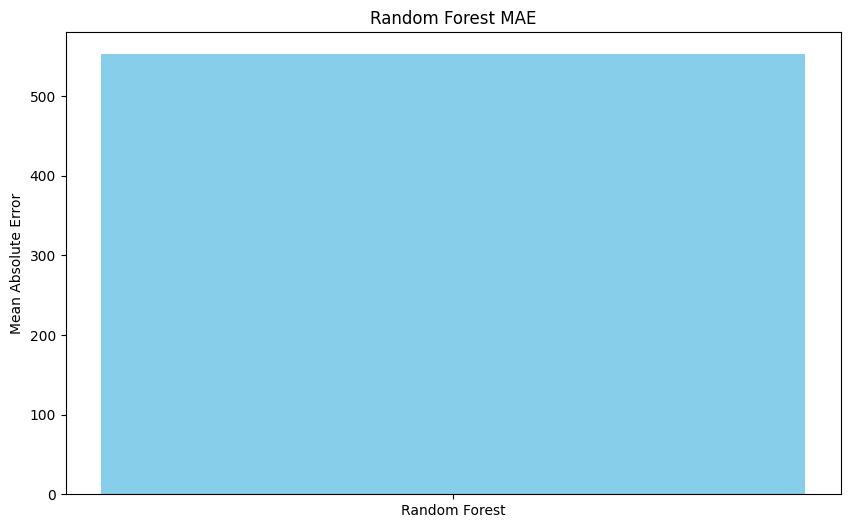

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Setup the pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestRegressor(n_estimators=100, random_state=42))])

# Training the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Predicting and evaluating
y_pred_rf = rf_pipeline.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Plotting MAE for Random Forest
plt.figure(figsize=(10, 6))
plt.bar(['Random Forest'], [mae_rf], color=['skyblue'])
plt.ylabel('Mean Absolute Error')
plt.title('Random Forest MAE')
plt.show()


In [ ]:
pip install tensorflow


2645/2645 [==============================] - 2s 865us/step
Neural Network MAE: 526.0259052851378


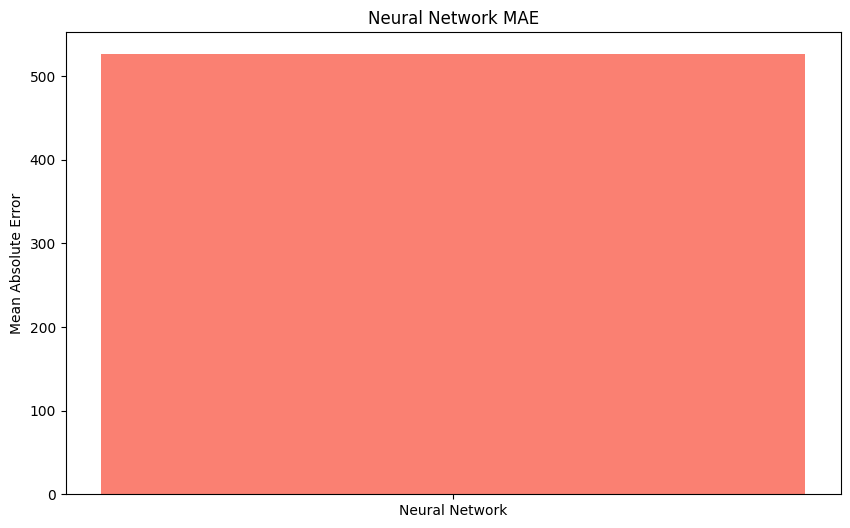

In [ ]:
from sklearn.model_selection import train_test_split

# Manually split the training data into training and validation sets
X_train_preprocessed, X_val_preprocessed, y_train, y_val = train_test_split(
    X_train_preprocessed, y_train, test_size=0.2, random_state=42)

# Convert sparse matrix to dense if necessary (check if your data is sparse)
if hasattr(X_train_preprocessed, "toarray"):
    X_train_preprocessed = X_train_preprocessed.toarray()
    X_val_preprocessed = X_val_preprocessed.toarray()
if hasattr(X_test_preprocessed, "toarray"):
    X_test_preprocessed = X_test_preprocessed.toarray()

# Continue with model building and fitting as before
model = build_model(input_shape)

# Fit the model, this time without validation_split and using the manually split validation data
history = model.fit(X_train_preprocessed, y_train, epochs=10, batch_size=10, verbose=0,
                    validation_data=(X_val_preprocessed, y_val))

# Predict and evaluate the model
y_pred_nn = model.predict(X_test_preprocessed).flatten()  # Flatten to convert predictions to 1D
mae_nn = mean_absolute_error(y_test, y_pred_nn)

# Output the MAE
print(f"Neural Network MAE: {mae_nn}")

# Plotting MAE for Neural Network
plt.figure(figsize=(10, 6))
plt.bar(['Neural Network'], [mae_nn], color=['salmon'])
plt.ylabel('Mean Absolute Error')
plt.title('Neural Network MAE')
plt.show()


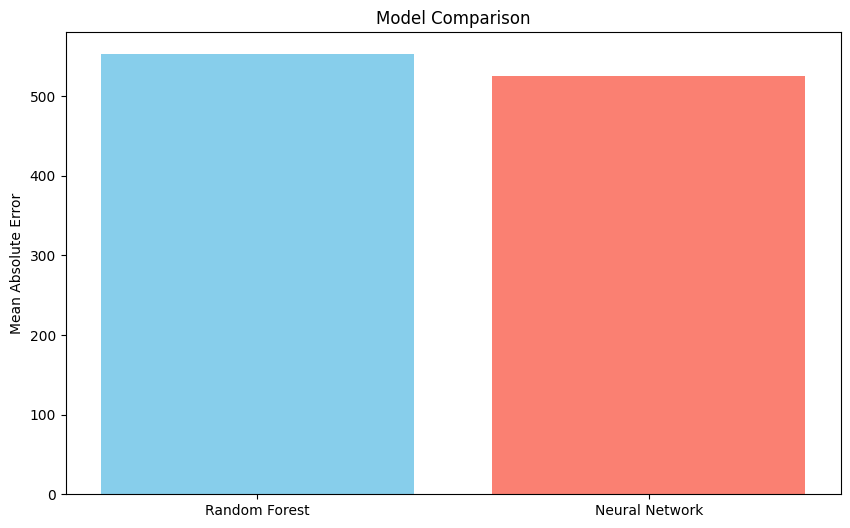

In [ ]:
plt.figure(figsize=(10, 6))
models = ['Random Forest', 'Neural Network']
maes = [mae_rf, mae_nn]
plt.bar(models, maes, color=['skyblue', 'salmon'])
plt.ylabel('Mean Absolute Error')
plt.title('Model Comparison')
plt.show()
